In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

position = 0
walk = [position]
nsteps = 1000
for _ in range(nsteps):
    step = 1 if random.randint(0, 1) else -1  # 0, 1중 난수를 발생시켜 0이면 -1, 1이면 1
    position += step
    walk.append(position)

In [10]:
plt.rcParams['figure.figsize'] = [20, 10]

<Figure size 720x720 with 0 Axes>

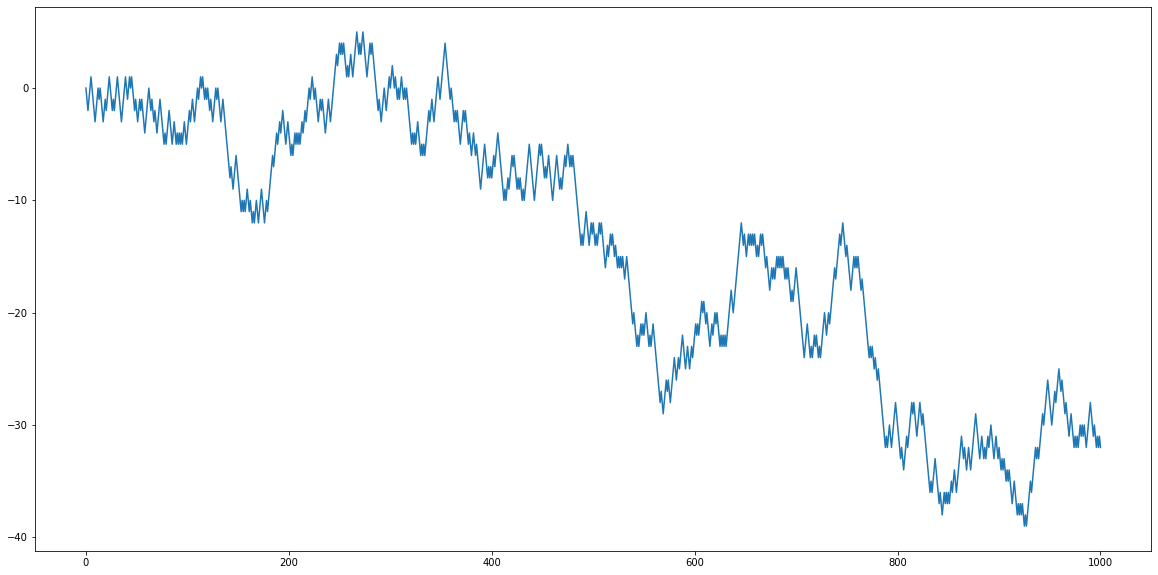

In [17]:
plt.figure(figsize=(20, 10))
plt.plot(walk)
plt.show()

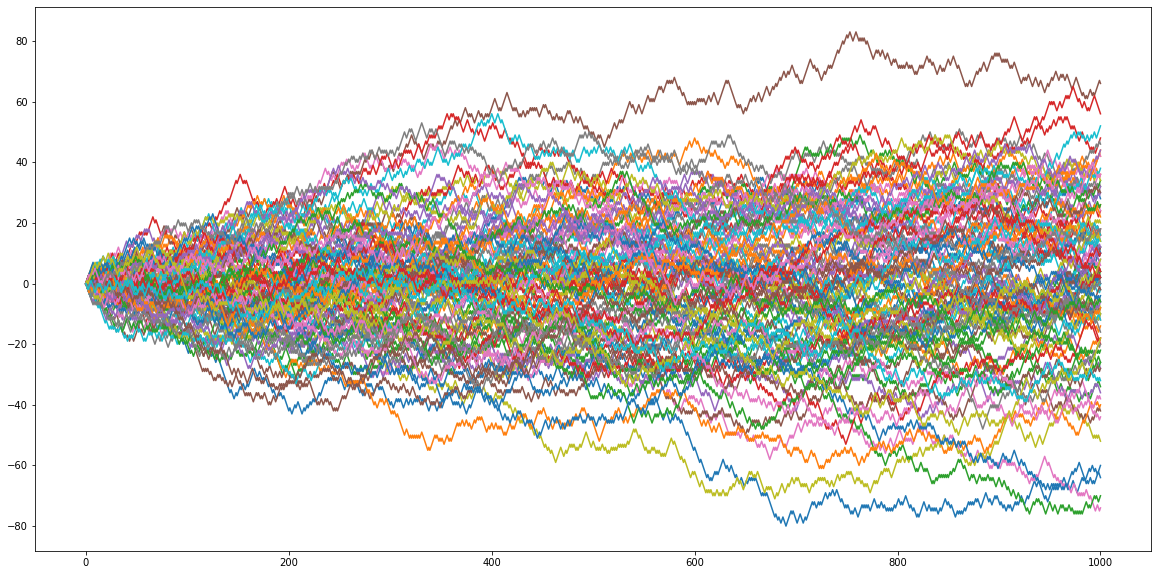

In [12]:
for i in range(100):
    position = 0
    walk = [position]
    nsteps = 1000
    for _ in range(nsteps):
        step = 1 if random.randint(0, 1) else -1  # 0, 1중 난수를 발생시켜 0이면 -1, 1이면 1
        position += step
        walk.append(position)
    plt.plot(walk)
plt.show()

In [9]:
nsteps = 1000
rng = np.random.default_rng(seed=12345)  # 난수 초기화, seed 설정
draws = rng.integers(0, 2, size=nsteps)  # 0또는 1을 가지는 난수 nstep만큼 생성
steps = np.where(draws == 0, 1, -1)  # draws배열에서 값이 0인경우 1, 아니면 -1
walk = steps.cumsum()  # steps 배열의 누적합계 계산

In [25]:
walk

array([-1,  0, -1,  0,  1,  0, -1, -2, -3, -2, -3, -2, -3, -4, -3, -2, -1,
       -2, -3, -4, -5, -4, -5, -6, -7, -8, -7, -6, -5, -4, -3, -4, -3, -4,
       -3, -2, -1, -2, -3, -2, -3, -2, -1,  0, -1,  0,  1,  2,  3,  4,  3,
        2,  3,  4,  5,  6,  7,  8,  9,  8,  7,  6,  5,  4,  5,  4,  3,  2,
        1,  0, -1, -2, -3, -4, -3, -4, -5, -4, -3, -2, -3, -2, -3, -4, -5,
       -4, -5, -6, -5, -4, -3, -2, -3, -2, -3, -2, -1,  0,  1,  0,  1,  2,
        1,  2,  1,  0,  1,  2,  3,  4,  3,  4,  3,  4,  3,  4,  3,  4,  5,
        6,  5,  6,  7,  8,  7,  8,  7,  8,  7,  8,  7,  8,  7,  8,  7,  8,
        7,  6,  7,  8,  9,  8,  7,  8,  9,  8,  9,  8,  7,  8,  7,  6,  7,
        8,  9, 10, 11, 10,  9,  8,  9,  8,  9, 10,  9, 10,  9,  8,  7,  8,
        7,  6,  5,  6,  7,  6,  5,  6,  5,  6,  7,  8,  9, 10,  9,  8,  7,
        6,  5,  6,  5,  6,  7,  8,  7,  6,  7,  8,  9, 10, 11, 12, 13, 14,
       13, 12, 13, 14, 15, 14, 13, 14, 15, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 24

In [10]:
walk.min()

-8

In [11]:
walk.max()

50

In [13]:
(np.abs(walk) >= 10).argmax()  # 절대값이 10 이상인 첫번째 값의 인덱스 반환

155

In [17]:
nwalks = 5000
nsteps = 1000
draws = rng.integers(0, 2, size=(nwalks, nsteps))
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(axis=1)

In [18]:
walks

array([[  1,   0,   1, ..., -28, -29, -30],
       [  1,   0,   1, ..., -20, -19, -18],
       [ -1,   0,   1, ...,  38,  39,  40],
       ...,
       [  1,   2,   1, ..., -14, -13, -12],
       [ -1,   0,  -1, ..., -16, -17, -18],
       [  1,   0,  -1, ..., -14, -15, -14]])

In [19]:
walks.max()

112

In [20]:
walks.min()

-122

In [21]:
hits30 = (np.abs(walks) >= 30).any(axis=1)
hits30

array([ True, False,  True, ..., False, False,  True])

In [23]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(axis=1)
crossing_times

array([917, 507, 491, ..., 945, 619, 801])

In [26]:
crossing_times.mean()

505.55802908875035

In [36]:
draws = 0.25 * rng.standard_normal((nwalks, nsteps))

In [38]:
draws

array([[-0.18302877, -0.04051682,  0.1145671 , ...,  0.09499398,
         0.13441568, -0.16456476],
       [ 0.07104172, -0.05907344,  0.5674104 , ...,  0.32510044,
         0.31639726, -0.33225522],
       [ 0.49048457,  0.13897527, -0.11243638, ...,  0.20870433,
         0.02054253, -0.22332623],
       ...,
       [ 0.17243336, -0.1314691 , -0.03891113, ..., -0.18577451,
        -0.18302842,  0.27824502],
       [-0.38586938, -0.14370208, -0.08793589, ...,  0.06906527,
         0.49671983,  0.2630284 ],
       [ 0.06313029,  0.04397189,  0.20383991, ...,  0.28464779,
        -0.33438541, -0.35550374]])

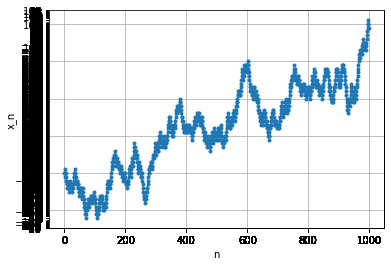

In [40]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(1000):
    N = 1000 ### 스텝 횟수

    R = np.random.random(N) ### [0,1] 사이에서 균등 분포를 갖는 무작위 변수 N개 생성

    X = []
    x_0 = 0
    X.append(x_0) ### X의 초기값 x_0 = 0으로 정의하고 수열에 포함

    for n in range(1, N):
        r = R[n]
        x_prev = X[n-1]
        if r <= 1/2:
            x_next = x_prev + 1 ### 1/2<r 경우 +1
        else:
            x_next = x_prev - 1 ### 그렇지 않은 경우 -1

        X.append(x_next)
    
    ax = fig.add_subplot(1,1,1)
    ax.plot(range(N), X, marker = 'o', markersize=3, lw = 1)
plt.xlabel('n')
plt.ylabel('x_n')
plt.grid()
plt.show()